In [1]:
V =(ord('С') + ord('А')) % 8
V

1

In [2]:
import numpy as np
import pandas as pd
import mlxtend.frequent_patterns as ml

In [34]:
df = pd.read_csv('lastfm.csv')
#df['country'].unique()
df.head()

,user,artist,sex,country
0,1,red hot chili peppers,f,Germany
1,1,the black dahlia murder,f,Germany
2,1,goldfrapp,f,Germany
3,1,dropkick murphys,f,Germany
4,1,le tigre,f,Germany


In [ ]:
Проводим группировку и указываем правило склеивания для столбца artist

In [4]:
groupped = df.groupby('user')['artist'].apply(';'.join)
groupped

user
1        red hot chili peppers;the black dahlia murder;...
3        devendra banhart;boards of canada;cocorosie;ap...
4        tv on the radio;tool;kyuss;dj shadow;air;a tri...
5        dream theater;ac/dc;metallica;iron maiden;bob ...
6        lily allen;kanye west;sigur rós;pink floyd;ste...
                               ...                        
19713    armin van buuren;above & beyond;atb;ferry cors...
19714    misfits;type o negative;arch enemy;red hot chi...
19715    abba;james blunt;jason mraz;amy winehouse;quee...
19717    marilyn manson;beyoncé;madonna;t.a.t.u.;katy p...
19718    beirut;of montreal;black flag;the new pornogra...
Name: artist, Length: 15000, dtype: object

In [5]:
#бинаризация показателя
binary_data = groupped.str.get_dummies(";")
binary_data.iloc[0:10, 100:110]

,beastie boys,beatsteaks,beck,bee gees,behemoth,beirut,belle and sebastian,ben folds,ben folds five,ben harper
user,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0
12,0,0,0,1,0,0,0,0,0,0
13,0,0,0,0,0,0,0,0,0,0


In [6]:
binary_data = binary_data.astype(bool)
#поиск характерных комбинаций
freq_items = ml.apriori(binary_data, min_support = 0.05, use_colnames = True)
print("Найдено %d характерных комбинаций" % len(freq_items))
freq_items

Найдено 65 характерных комбинаций


,support,itemsets
0,0.061400,(ac/dc)
1,0.069600,(air)
2,0.062733,(amy winehouse)
3,0.075467,(arctic monkeys)
4,0.057467,(beck)
...,...,...
60,0.069200,(the white stripes)
61,0.050800,(tool)
62,0.068000,(u2)
63,0.054600,"(radiohead, coldplay)"


In [ ]:
Ищем характерные комбинации по нескольким странам

In [8]:
countries = ['Germany', 'United States', 'Italy', 'Greece', 'France'] 
all_freq_c = []
for c in countries:
    df_c = df[df['country']==c]
    groupped_c = df_c.groupby('user')['artist'].apply(';'.join)
    bin_data_c = groupped_c.str.get_dummies(';').astype(bool)
    freq_c = ml.apriori(bin_data_c, min_support=0.05, use_colnames=True)
    print(f"Найдено %d характерных комбинаций {c}" % len(freq_c))
    freq_c['country'] = c
    freq_c['length'] = freq_c['itemsets'].apply(lambda x: len(x))
    display(freq_c.sort_values('length'))
    all_freq_c.append(freq_c)
country_freq = pd.concat(all_freq_c, ignore_index=True)
country_freq['key'] = country_freq['itemsets'].apply(', '.join)
pivot_country = country_freq.pivot_table(index='key', columns='country', values='support', fill_value=0.0)
display(pivot_country.head())

Найдено 82 характерных комбинаций Germany


,support,itemsets,country,length
0,0.065235,(3 doors down),Germany,1
1,0.050119,(30 seconds to mars),Germany,1
2,0.065235,([unknown]),Germany,1
3,0.070804,(ac/dc),Germany,1
4,0.076372,(air),Germany,1
...,...,...,...,...
77,0.050915,"(die Ärzte, linkin park)",Germany,2
78,0.056484,"(die Ärzte, rammstein)",Germany,2
79,0.054893,"(die Ärzte, red hot chili peppers)",Germany,2
80,0.056484,"(die Ärzte, system of a down)",Germany,2


Найдено 106 характерных комбинаций United States


,support,itemsets,country,length
0,0.058176,(air),United States,1
1,0.059552,(andrew bird),United States,1
2,0.079862,(animal collective),United States,1
3,0.074010,(arcade fire),United States,1
4,0.067126,(beastie boys),United States,1
...,...,...,...,...
101,0.052668,"(the beatles, pink floyd)",United States,2
102,0.056454,"(sufjan stevens, radiohead)",United States,2
103,0.100172,"(radiohead, the beatles)",United States,2
104,0.058520,"(radiohead, the shins)",United States,2


Найдено 108 характерных комбинаций Italy


,support,itemsets,country,length
0,0.062500,(a perfect circle),Italy,1
1,0.095395,(ac/dc),Italy,1
2,0.052632,(aerosmith),Italy,1
3,0.088816,(air),Italy,1
4,0.055921,(amy winehouse),Italy,1
...,...,...,...,...
103,0.105263,"(radiohead, the beatles)",Italy,2
104,0.052632,"(radiohead, the cure)",Italy,2
105,0.055921,"(radiohead, the strokes)",Italy,2
106,0.055921,"(radiohead, u2)",Italy,2


Найдено 1287 характерных комбинаций Greece


,support,itemsets,country,length
0,0.051724,([unknown]),Greece,1
1,0.051724,(ac/dc),Greece,1
2,0.068966,(air),Greece,1
3,0.068966,(amon tobin),Greece,1
4,0.086207,(amy macdonald),Greece,1
...,...,...,...,...
1282,0.051724,"(feist, boards of canada, sia, massive attack,...",Greece,9
1283,0.051724,"(lamb, feist, boards of canada, sia, massive a...",Greece,9
1284,0.051724,"(lamb, boards of canada, sia, massive attack, ...",Greece,9
1285,0.051724,"(lamb, feist, sia, massive attack, goldfrapp, ...",Greece,9


Найдено 91 характерных комбинаций France


,support,itemsets,country,length
0,0.061162,(ac/dc),France,1
1,0.140673,(air),France,1
2,0.061162,(amon tobin),France,1
3,0.088685,(amy winehouse),France,1
4,0.076453,(arcade fire),France,1
...,...,...,...,...
86,0.051988,"(radiohead, placebo)",France,2
87,0.061162,"(radiohead, portishead)",France,2
88,0.051988,"(red hot chili peppers, radiohead)",France,2
89,0.079511,"(radiohead, the beatles)",France,2


country,France,Germany,Greece,Italy,United States
key,,,,,
3 doors down,0.000000,0.065235,0.000000,0.000000,0.0
30 seconds to mars,0.000000,0.050119,0.000000,0.000000,0.0
[unknown],0.000000,0.065235,0.051724,0.000000,0.0
a perfect circle,0.000000,0.000000,0.000000,0.062500,0.0
ac/dc,0.061162,0.070804,0.051724,0.095395,0.0


In [9]:
rules = ml.association_rules(freq_items, metric = "lift", min_threshold = 1)
rules[0:15]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(radiohead),(coldplay),0.180267,0.158533,0.0546,0.302885,1.910542,1.0,0.026022,1.207069,0.581394,0.192118,0.171547,0.323646
1,(coldplay),(radiohead),0.158533,0.180267,0.0546,0.344407,1.910542,1.0,0.026022,1.250369,0.566378,0.192118,0.200236,0.323646
2,(radiohead),(the beatles),0.180267,0.177867,0.0582,0.322855,1.815152,1.0,0.026137,1.214117,0.547839,0.194043,0.176356,0.325033
3,(the beatles),(radiohead),0.177867,0.180267,0.0582,0.327211,1.815152,1.0,0.026137,1.218411,0.546240,0.194043,0.179259,0.325033


In [ ]:
Строим характерные комбинации по полу

In [10]:
sex = ['f', 'm']
all_freq_s = []
for s in sex:
    df_s = df[df['sex']==s]
    groupped_s = df_s.groupby('user')['artist'].apply(';'.join)
    bin_data_s = groupped_s.str.get_dummies(';').astype(bool)
    freq_s = ml.apriori(bin_data_s, min_support=0.05, use_colnames=True)
    print(f"Найдено %d характерных комбинаций {s}" % len(freq_s))
    freq_s['sex'] = s
    freq_s['length'] = freq_s['itemsets'].apply(lambda x: len(x))
    display(freq_s.sort_values('length'))
    all_freq_s.append(freq_s)
sex_freq = pd.concat(all_freq_s, ignore_index=True)
sex_freq['key'] = sex_freq['itemsets'].apply(lambda s: ', '.join(sorted(list(s))))
pivot_sex = sex_freq.pivot_table(index='key', columns='sex', values='support', fill_value=0.0)
display(pivot_sex.head())

Найдено 91 характерных комбинаций f


,support,itemsets,sex,length
0,0.050636,(30 seconds to mars),f,1
1,0.073747,(air),f,1
2,0.106466,(amy winehouse),f,1
3,0.055570,(arcade fire),f,1
4,0.094261,(arctic monkeys),f,1
...,...,...,...,...
86,0.054272,"(coldplay, muse)",f,2
87,0.068813,"(radiohead, coldplay)",f,2
88,0.063360,"(coldplay, the beatles)",f,2
89,0.059984,"(the killers, coldplay)",f,2


Найдено 62 характерных комбинаций m


,support,itemsets,sex,length
0,0.071935,(ac/dc),m,1
1,0.068168,(air),m,1
2,0.068975,(arctic monkeys),m,1
3,0.056418,(beck),m,1
4,0.057315,(björk),m,1
...,...,...,...,...
57,0.061440,(the smashing pumpkins),m,1
58,0.067002,(the white stripes),m,1
59,0.056328,(tool),m,1
60,0.072293,(u2),m,1


sex,f,m
key,,
30 seconds to mars,0.050636,0.000000
ac/dc,0.000000,0.071935
air,0.073747,0.068168
amy winehouse,0.106466,0.000000
arcade fire,0.055570,0.000000


In [ ]:
сравнение результатов поиска характерных комбинаций у разных алгоритмов 

In [11]:
min_sup = 0.04  

rows = []

for c in countries:
    df_c = df[df['country'] == c]
    grp_c = df_c.groupby('user')['artist'].apply(';'.join)
    X_c = grp_c.str.get_dummies(';').astype(bool)

    fi_ap = ml.apriori(X_c,  min_support=min_sup, use_colnames=True)
    fi_fp = ml.fpgrowth(X_c, min_support=min_sup, use_colnames=True)
    fi_fx = ml.fpmax(X_c,    min_support=min_sup, use_colnames=True)

    for name, fi in [('apriori', fi_ap), ('fpgrowth', fi_fp), ('fpmax', fi_fx)]:
        fi['length'] = fi['itemsets'].apply(len)
        rows.append({
            'country': c,
            'algo': name,
            'n_itemsets': len(fi),
            'avg_len': fi['length'].mean(),
            'max_len': fi['length'].max()
        })

cmp_by_country = pd.DataFrame(rows)
display(cmp_by_country.sort_values(['country','algo']))

,country,algo,n_itemsets,avg_len,max_len
12,France,apriori,142,1.323944,2
13,France,fpgrowth,142,1.323944,2
14,France,fpmax,114,1.403509,2
0,Germany,apriori,126,1.119048,2
1,Germany,fpgrowth,126,1.119048,2
2,Germany,fpmax,114,1.131579,2
9,Greece,apriori,1287,4.393939,10
10,Greece,fpgrowth,1287,4.393939,10
11,Greece,fpmax,108,1.731481,10
6,Italy,apriori,175,1.411429,3


In [ ]:
Построение ассоциативных правил для Греции

In [12]:
df_gr = df[df['country'] == 'Greece'].copy()
groupped = df_gr.groupby('user')['artist'].apply(';'.join)
bin_data = groupped.str.get_dummies(';').astype(bool)
freq = ml.apriori(bin_data, min_support=0.05, use_colnames=True) 

In [36]:
rules = ml.association_rules(freq, metric='confidence', min_threshold=0.5)

rules = (rules
         .sort_values(['lift','confidence','conviction'], ascending=False)
         .reset_index(drop=True))
rules[['antecedents','consequents','support','confidence','lift','conviction','leverage']].head(15)

,antecedents,consequents,support,confidence,lift,conviction,leverage
0,"(feist, boards of canada)",(télépopmusik),0.051724,1.0,19.333333,inf,0.049049
1,(télépopmusik),"(feist, boards of canada)",0.051724,1.0,19.333333,inf,0.049049
2,"(goldfrapp, boards of canada)",(télépopmusik),0.051724,1.0,19.333333,inf,0.049049
3,(télépopmusik),"(goldfrapp, boards of canada)",0.051724,1.0,19.333333,inf,0.049049
4,"(lamb, boards of canada)",(télépopmusik),0.051724,1.0,19.333333,inf,0.049049
5,(télépopmusik),"(lamb, boards of canada)",0.051724,1.0,19.333333,inf,0.049049
6,"(boards of canada, sia)",(télépopmusik),0.051724,1.0,19.333333,inf,0.049049
7,(télépopmusik),"(boards of canada, sia)",0.051724,1.0,19.333333,inf,0.049049
8,"(boards of canada, tricky)",(télépopmusik),0.051724,1.0,19.333333,inf,0.049049
9,(télépopmusik),"(boards of canada, tricky)",0.051724,1.0,19.333333,inf,0.049049


In [14]:
rules['rule_length'] = rules['antecedents'].apply(len) + rules['consequents'].apply(len)

long_rules = rules[rules['rule_length'] >= 5]
short_rules = rules[rules['rule_length'] < 5]


In [15]:
display(
        long_rules[['antecedents', 'consequents', 'rule_length', 'support', 'confidence', 'lift','conviction','leverage']]
        .sort_values('lift', ascending=False)
    )

,antecedents,consequents,rule_length,support,confidence,lift,conviction,leverage
840,"(lamb, bonobo, massive attack)","(radiohead, air)",5,0.051724,1.00,19.333333,inf,0.049049
841,"(lamb, bonobo, air)","(massive attack, radiohead)",5,0.051724,1.00,19.333333,inf,0.049049
842,"(lamb, radiohead, massive attack)","(bonobo, air)",5,0.051724,1.00,19.333333,inf,0.049049
843,"(lamb, massive attack, air)","(radiohead, bonobo)",5,0.051724,1.00,19.333333,inf,0.049049
844,"(massive attack, radiohead, bonobo)","(lamb, air)",5,0.051724,1.00,19.333333,inf,0.049049
...,...,...,...,...,...,...,...,...
56799,"(lamb, boards of canada, sia, massive attack, ...",(portishead),9,0.051724,1.00,4.833333,inf,0.041023
56800,"(lamb, feist, sia, massive attack, röyksopp, t...",(portishead),9,0.051724,1.00,4.833333,inf,0.041023
56801,"(lamb, feist, boards of canada, sia, massive a...",(portishead),10,0.051724,1.00,4.833333,inf,0.041023
56819,"(feist, goldfrapp, röyksopp, sia)",(massive attack),5,0.051724,0.75,4.833333,3.379310,0.041023


In [37]:
compare_df = pd.DataFrame({
    'n_rules': [len(long_rules), len(short_rules)],
    'support_mean': [long_rules['support'].mean(), short_rules['support'].mean()],
    'confidence_mean': [long_rules['confidence'].mean(), short_rules['confidence'].mean()],
    'confidence_median': [long_rules['confidence'].median(), short_rules['confidence'].median()],
    'lift_mean': [long_rules['lift'].mean(), short_rules['lift'].mean()],
    'leverage_mean': [long_rules['leverage'].mean(), short_rules['leverage'].mean()],
    'conviction_mean': [
        long_rules['conviction'].replace([np.inf,-np.inf], np.nan).dropna().mean(),
        short_rules['conviction'].replace([np.inf,-np.inf], np.nan).dropna().mean()
    ],
}, index=['len>=5','len<5'])

display(compare_df)

,n_rules,support_mean,confidence_mean,confidence_median,lift_mean,leverage_mean,conviction_mean
len>=5,52748,0.051724,0.963440,1.0,17.721599,0.048655,3.438008
len<5,4122,0.052197,0.865668,1.0,13.282655,0.047651,3.212428


In [17]:
trivial_rules = (
    rules
    .query('lift >= 0.98 and lift < 2.5')            
    .query('`consequent support` >= 0.20')             
    .sort_values(['confidence','support'], ascending=False)
    [['antecedents','consequents','support','confidence','lift','leverage']]
)
display(trivial_rules.head(20))


,antecedents,consequents,support,confidence,lift,leverage
56868,(röyksopp),(portishead),0.051724,0.5,2.416667,0.030321
56869,(tool),(portishead),0.051724,0.5,2.416667,0.030321


In [18]:
nontrivial_rules = (rules
    .query('lift >= 1.5 and leverage >= 0.005')
    .query('support >= 0.01 and confidence >= 0.5')
    .sort_values(['lift','leverage','confidence'], ascending=False)
    [['antecedents','consequents','support','confidence','lift','leverage']]
)
display(nontrivial_rules.head())

,antecedents,consequents,support,confidence,lift,leverage
0,"(feist, boards of canada)",(télépopmusik),0.051724,1.0,19.333333,0.049049
1,(télépopmusik),"(feist, boards of canada)",0.051724,1.0,19.333333,0.049049
2,"(goldfrapp, boards of canada)",(télépopmusik),0.051724,1.0,19.333333,0.049049
3,(télépopmusik),"(goldfrapp, boards of canada)",0.051724,1.0,19.333333,0.049049
4,"(lamb, boards of canada)",(télépopmusik),0.051724,1.0,19.333333,0.049049


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

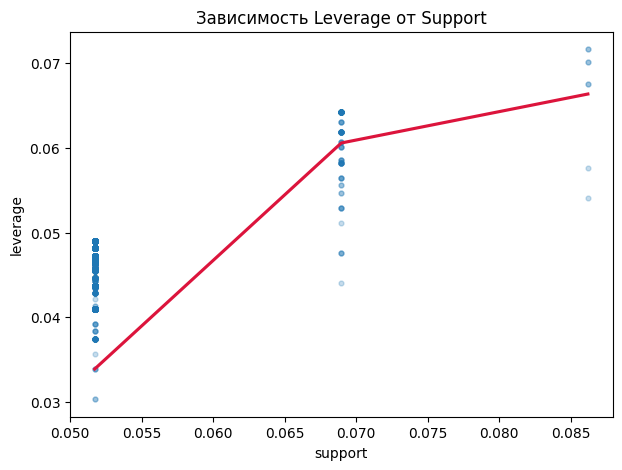

In [23]:
plt.figure(figsize=(7,5))
ax = sns.regplot(
    data=rules, x='support', y='leverage',
    lowess=True, scatter_kws={'alpha':0.25, 's':12}, line_kws={'color':'crimson'}
)
ax.set_title('Зависимость Leverage от Support')
plt.show()

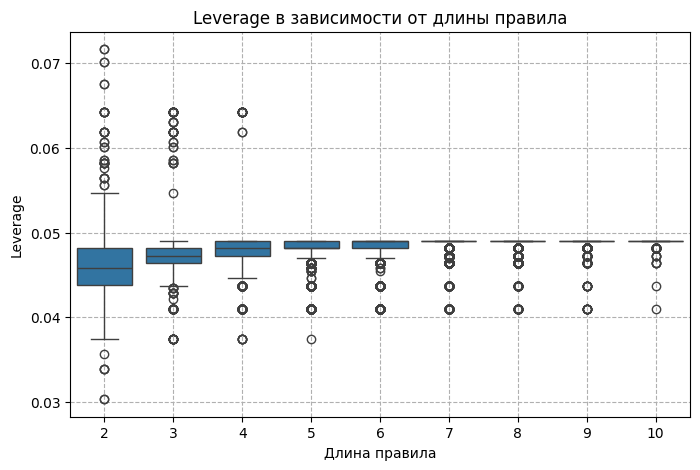

In [33]:
plt.figure(figsize=(8,5))
sns.boxplot(data=rules, x='rule_length', y='leverage')
plt.xlabel('Длина правила')
plt.ylabel('Leverage')
plt.title('Leverage в зависимости от длины правила')
plt.grid(True, linestyle='--')
plt.show()